In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('src/data_tms.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- PassengerId - id пассажира
- Survived - Выживаемость
- Pclass - Класс обслуживания пассажира 
- Name - Имя
- Sex - Пол
- Age - Возраст
- SibSp - Количество братьев, сестер или супругов на борту
- Parch - Количество родителей или детей на борту
- Ticket - номер билета
- Fare - Стоимость билета
- Cabin - Кабина
- Embarked - Порт посадки на корабль

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В колонке Cabine слишком много прпущенных значений, не учитываем ее при анализе ??

<Axes: >

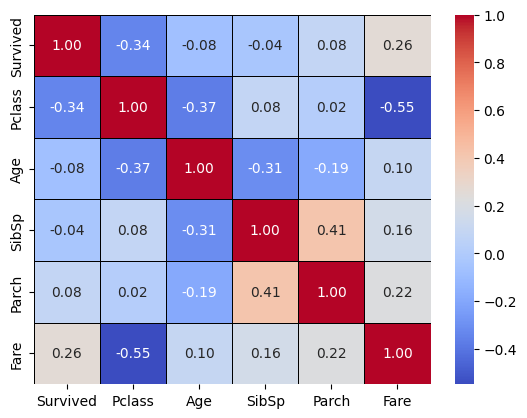

In [33]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop(['PassengerId'])
sns.heatmap(data=df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7, linecolor='black')

In [12]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [34]:
df['Surname'] = df['Name'].str.split(',').str[0]

Добавим колокни принадлежность к семье и количество членов семьи

Количество членов семьи будем определять по формуле: FamilySize = 1 + SibSp + Parch

Принадлежность к семье: если колество членов семьи  >1 

In [37]:
df['FamilySize'] = 1 + df['SibSp'] + df['Parch']
df['HasFamily'] = (df['FamilySize'] > 1).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize,HasFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,4,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,0


Добавим колонку FamilyId

In [51]:
df['FamilyId'] = df['Surname'] + '_' + df['Ticket'] + '_' + df['Embarked']
df['FamilyId'] = pd.factorize(df['FamilyId'])[0] + 1
df.loc[df['HasFamily'] == 0, 'FamilyId'] = 0
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize,HasFamily,FamilyId
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,4,1,660
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,0,0


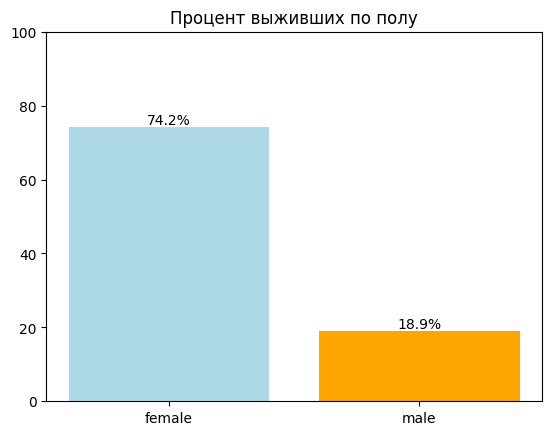

In [100]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100
bars = plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['lightblue', 'orange'])

plt.title('Процент выживших по полу')
plt.ylim(0, 100)

for i, (_, rate) in enumerate(survival_rate_by_sex.items()):
    plt.text(i, rate, f'{rate:.1f}%', ha='center', va='bottom')


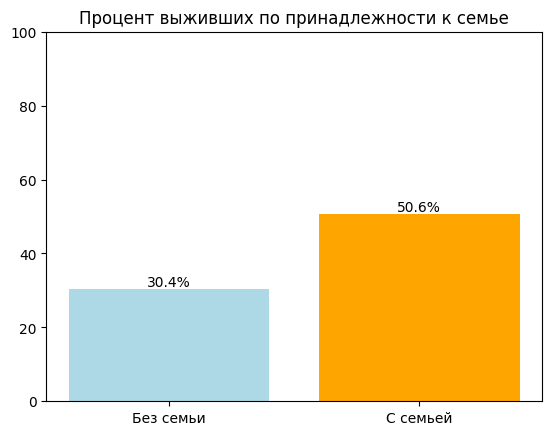

In [112]:
survival_rate_by_hasfaminy = df.groupby('HasFamily')['Survived'].mean() * 100
bars = plt.bar(survival_rate_by_hasfaminy.index, survival_rate_by_hasfaminy.values, color=['lightblue', 'orange'])

plt.title('Процент выживших по принадлежности к семье')
plt.ylim(0, 100)
plt.xticks([0, 1], ['Без семьи', 'С семьей'])

for i, (_, rate) in enumerate(survival_rate_by_hasfaminy.items()):
    plt.text(i, rate, f'{rate:.1f}%', ha='center', va='bottom')


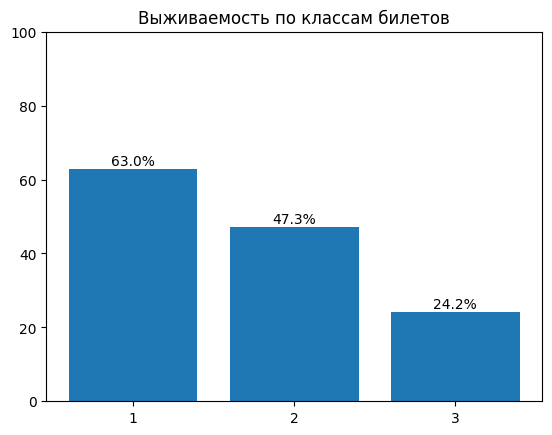

In [125]:
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
bars = plt.bar(survival_rate_by_pclass.index, survival_rate_by_pclass.values)

plt.title('Выживаемость по классам билетов')
plt.ylim(0, 100)
plt.xticks([1, 2, 3])

for  pclass, rate in survival_rate_by_pclass.items():
    plt.text(pclass, rate, f'{rate:.1f}%', ha='center', va='bottom')

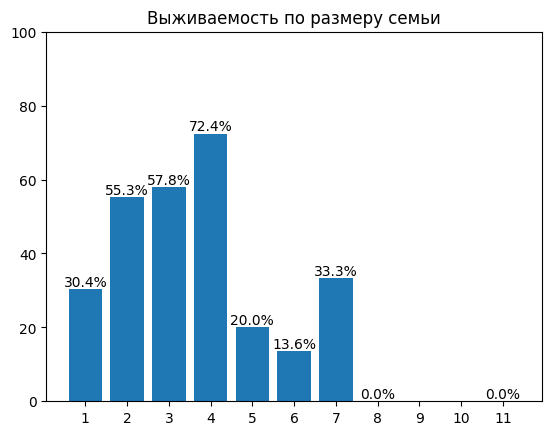

In [137]:
survival_rate_by_familysize = df.groupby('FamilySize')['Survived'].mean() * 100
bars = plt.bar(survival_rate_by_familysize.index, survival_rate_by_familysize.values)

plt.title('Выживаемость по размеру семьи')
plt.ylim(0, 100)
plt.xticks(range(1, df['FamilySize'].max() + 1))

for  pclass, rate in survival_rate_by_familysize.items():
    plt.text(pclass, rate, f'{rate:.1f}%', ha='center', va='bottom')

Добавлем колонку градации по возрасту

In [155]:
bins = [0, 12, 18, 25, 60, 100] 
labels = ['Ребенок', 'Подросток', 'Молодой', 'Взрослый', 'Пожилой']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,FamilySize,HasFamily,FamilyId,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,2,1,1,Молодой
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,2,1,2,Взрослый
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,1,0,0,Взрослый
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,2,1,4,Взрослый
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,1,0,0,Взрослый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,1,0,0,Взрослый
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,1,0,0,Молодой
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,4,1,660,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,1,0,0,Взрослый
